In [1]:
library('bedtoolsr')
library('dplyr')
# library('tidyr')
library(ggplot2)
library("UpSetR")
library("reshape2")
library('ggpointdensity')
library(viridis)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite



In [2]:
# Read in model
df <- read.csv('vRG.SCZ.8.12.24.csv', row.names = 1)

In [3]:
head(df)

,X,X.chrom,chromStart,chromEnd,name,ref,altCount,alts,shiftBases,freqSourceCount,⋯,neg_observed_inactive_allele,neg_observed_seqlet_len,neg_prominence_pval,neg_magnitude_pval,delta_score,delta_p_val,explain_score,explain_pval,ISM_score,ISM_pval
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,⋯,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,chr15,61541029,61542029,rs11071612,C,2,G,0,31,⋯,noneffect,7,0.7335081,0.7273919,-2.160185,0.2880447,-0.25464790,0.2808279,-0.254690,0.2807297
1,2,chr15,61541029,61542029,rs11071612,C,2,T,0,31,⋯,noneffect,7,0.6430756,0.5640017,-0.621525,0.7549488,-0.07524370,0.7442613,-0.075250,0.7440960
2,3,chr19,11737922,11738922,rs72986630,C,2,A,0,31,⋯,effect,7,0.9875491,0.9927916,0.655534,0.7378480,0.07122056,0.7541823,0.071630,0.7530981
3,4,chr19,11737922,11738922,rs72986630,C,2,T,0,31,⋯,noneffect,7,0.4613368,0.5762342,-1.640700,0.4143909,-0.19716426,0.3983110,-0.197775,0.3968563
4,5,chr6,27019122,27020122,rs9379952,A,3,C,0,31,⋯,effect,7,0.9875491,0.9927916,0.695888,0.7225818,0.07750665,0.7335461,0.076760,0.7362541
5,6,chr6,27019122,27020122,rs9379952,A,3,G,0,31,⋯,effect,7,0.9875491,0.9927916,2.363651,0.2455278,0.27203570,0.2495386,0.271770,0.2501543



	Pearson's product-moment correlation

data:  df$explain_score and df$delta_score
t = 650.3, df = 1524, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9980133 0.9983745
sample estimates:
     cor 
0.998203 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


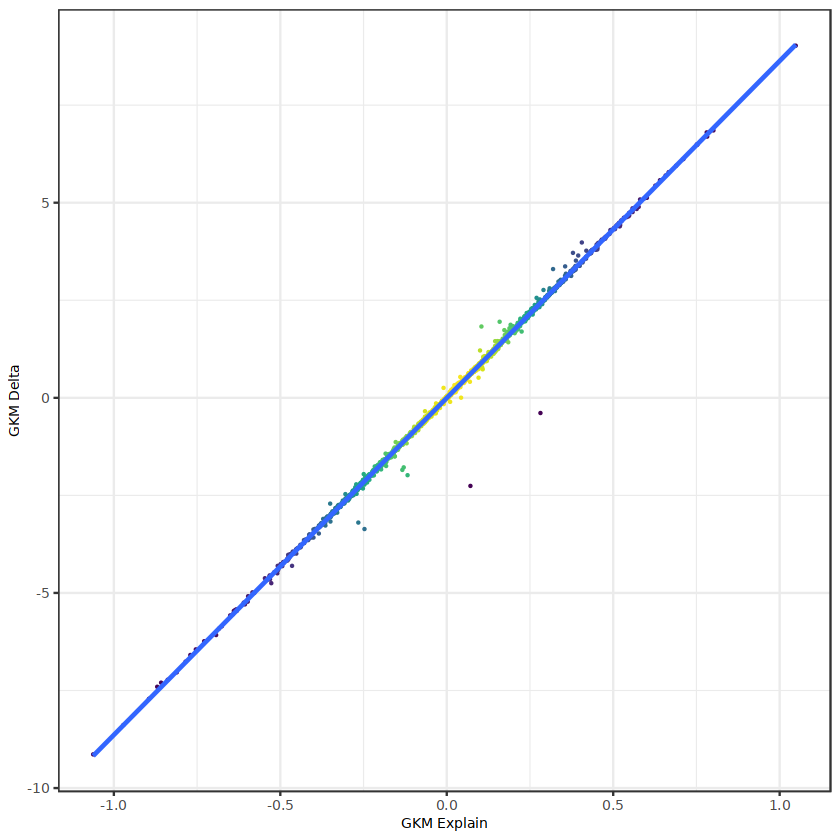

In [4]:
 cor.test(df$explain_score, df$delta_score, method = "pearson", conf.level = 0.95)
ggplot(df, aes(x=explain_score,y=delta_score)) +
    # geom_point()
      geom_pointdensity(size = .2) +
      scale_color_viridis() +
      theme_bw() +
       theme( plot.title = element_text(color="Black", size=8, hjust = 0.5),
       # axis.text.x = element_text( angle=45, hjust = 1),
       axis.text = element_text(size = 8),
       legend.position = "none",
       axis.title=element_text(size=8)) +
    xlab('GKM Explain') +
    ylab("GKM Delta") + geom_smooth(method=lm, se=FALSE)
ggsave('vRG.SCZ.explain.delta.pdf', height = 1.25, width =1.25)


	Pearson's product-moment correlation

data:  df$ISM_score and df$delta_score
t = 561.46, df = 1524, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9973374 0.9978215
sample estimates:
      cor 
0.9975915 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


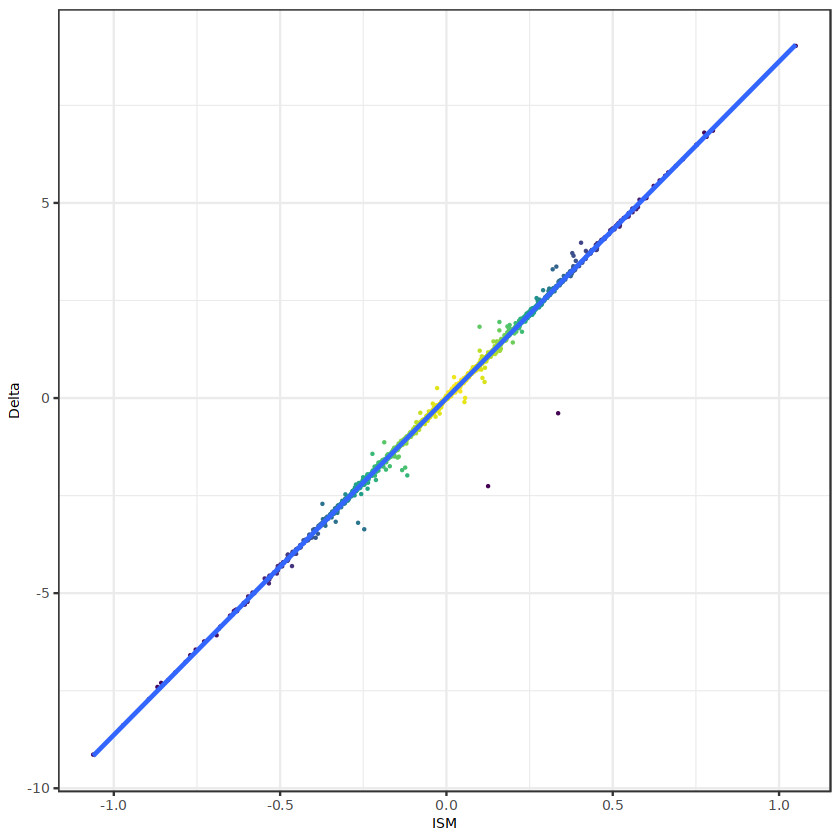

In [5]:
 cor.test(df$ISM_score, df$delta_score, method = "pearson", conf.level = 0.95)
ggplot(df, aes(x=ISM_score,y=delta_score)) +
    # geom_point()
      geom_pointdensity(size = .2) +
      scale_color_viridis() +
      theme_bw() +
       theme( plot.title = element_text(color="Black", size=8, hjust = 0.5),
       # axis.text.x = element_text( angle=45, hjust = 1),
       axis.text = element_text(size = 8),
       legend.position = "none",
       axis.title=element_text(size=8)) +
    xlab('ISM') +
    ylab("Delta") + geom_smooth(method=lm, se=FALSE)
ggsave('vRG.SCZ.ISM.delta.pdf', height = 1.25, width =1.25)


	Pearson's product-moment correlation

data:  df$explain_score and df$ISM_score
t = 2463.4, df = 1524, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9998612 0.9998865
sample estimates:
      cor 
0.9998745 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


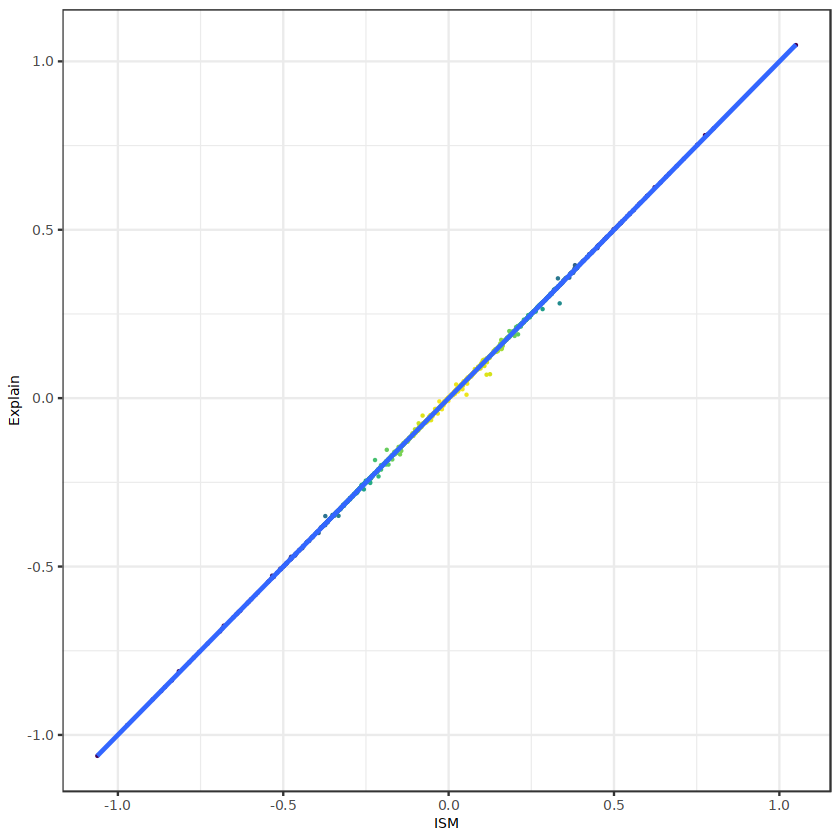

In [6]:
 cor.test(df$explain_score, df$ISM_score, method = "pearson", conf.level = 0.95)
ggplot(df, aes(x=ISM_score,y=explain_score)) +
    # geom_point()
      geom_pointdensity(size = .2) +
      scale_color_viridis() +
      theme_bw() +
       theme( plot.title = element_text(color="Black", size=8, hjust = 0.5),
       # axis.text.x = element_text( angle=45, hjust = 1),
       axis.text = element_text(size = 8),
       legend.position = "none",
       axis.title=element_text(size=8)) +
    xlab('ISM') +
    ylab("Explain") + geom_smooth(method=lm, se=FALSE)
ggsave('vRG.SCZ.explain.ISM.delta.pdf', height = 1.25, width =1.25)